In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from yahoo_historical import Fetcher


In [2]:
ticker = 'XQQ.TO'
start = [2018,12,31]

df = Fetcher(ticker, start).getHistorical()	
#df = df[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,51.389999,51.450001,50.700001,50.900002,50.392788,28200
1,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808601,177900
2,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155243,57300
3,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323421,81400
4,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838234,84800


In [3]:
#df.to_csv('XQQ.csv')

In [4]:
sum(df['Adj Close']-df['Close'])

-113.61926900000009

In [5]:
print(df.shape)

(376, 7)


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,51.389999,51.450001,50.700001,50.900002,50.392788,28200
1,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808601,177900
2,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155243,57300
3,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323421,81400
4,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838234,84800


In [7]:
exp1 = df.Close.shift(1).ewm(span=12, adjust=False).mean()
exp2 = df.Close.shift(1).ewm(span=26, adjust=False).mean()

macd = exp1-exp2
signal = macd.ewm(span=9, adjust=False).mean()

print(signal.shape)
print(macd.shape)

(376,)
(376,)


In [8]:
df['exp1'] = df.Close.ewm(span=12, min_periods=13, adjust=False).mean()
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,exp1
0,2018-12-31,51.389999,51.450001,50.700001,50.900002,50.392788,28200,NaN
1,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808601,177900,NaN
2,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155243,57300,NaN
3,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323421,81400,NaN
4,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838234,84800,NaN
5,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343151,157200,NaN
6,2019-01-09,53.049999,53.450001,52.869999,53.279999,52.749069,214600,NaN
7,2019-01-10,53.000000,53.430000,52.619999,53.419998,52.887676,215800,NaN
8,2019-01-11,53.279999,53.279999,52.950001,53.220001,52.689671,90400,NaN
9,2019-01-14,52.889999,52.950001,52.610001,52.849998,52.323357,84800,NaN


C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


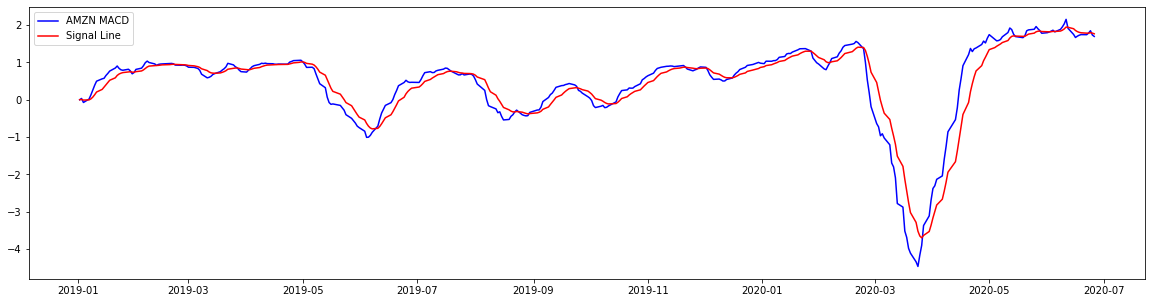

In [9]:
plt.figure(figsize=(20,5))
plt.plot(df.Date, macd, label='AMZN MACD', color = 'b')
plt.plot(df.Date, signal, label='Signal Line', color='r')
plt.legend(loc='upper left')
plt.show()


In [10]:
a = macd.values-signal.values
a.shape

(376,)

In [11]:
df['macd'] = macd-signal
df['buy'] = df.macd>0
df.buy = df.buy.astype(int)
df['chg_pct'] = 100*(df.Close-df.Close.shift(1))/df.Close.shift(1)
df['chg'] = df.Close-df.Close.shift(1)
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,exp1,macd,buy,chg_pct,chg
0,2018-12-31,51.389999,51.450001,50.700001,50.900002,50.392788,28200,NaN,NaN,0,NaN,NaN
1,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808601,177900,NaN,0.000000,0,0.825143,0.419998
2,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155243,57300,NaN,0.026803,1,-3.254088,-1.669998
3,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323421,81400,NaN,-0.064438,0,4.410872,2.189998
4,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838234,84800,NaN,0.021597,1,1.003088,0.520001
5,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343151,157200,NaN,0.107612,1,0.974022,0.509998
6,2019-01-09,53.049999,53.450001,52.869999,53.279999,52.749069,214600,NaN,0.188222,1,0.775487,0.410000
7,2019-01-10,53.000000,53.430000,52.619999,53.419998,52.887676,215800,NaN,0.254407,1,0.262761,0.139999
8,2019-01-11,53.279999,53.279999,52.950001,53.220001,52.689671,90400,NaN,0.290271,1,-0.374386,-0.199997
9,2019-01-14,52.889999,52.950001,52.610001,52.849998,52.323357,84800,NaN,0.282891,1,-0.695233,-0.370003


In [12]:
state=0
df_sig = []
for i in range(df.shape[0]):
    if((df.buy[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)
        
        

In [13]:
len(df_sig)

34

In [14]:
df_sig[0]

,Date,Open,High,Low,Close,Adj Close,Volume,exp1,macd,buy,chg_pct,chg
2,2019-01-03,50.45,50.73,49.65,49.65,49.1552,57300,NaN,0.0268033,1,-3.25409,-1.67


In [15]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.reset_index(drop=True)

In [16]:
df_sig['chg_pct'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)
df_sig

,Date,Open,High,Low,Close,Adj Close,Volume,exp1,macd,buy,chg_pct,chg
0,2019-01-03,50.45,50.73,49.65,49.65,49.1552,57300,NaN,0.0268033,1,NaN,-1.67
1,2019-01-04,50.58,52.01,50.44,51.84,51.3234,81400,NaN,-0.0644385,0,4.41087,2.19
2,2019-01-07,51.96,52.6,51.85,52.36,51.8382,84800,NaN,0.0215973,1,1.00309,0.520001
3,2019-01-30,54.03,54.94,53.92,54.78,54.2341,65000,53.8714,-0.0448796,0,4.62184,1.31
4,2019-02-01,55.32,55.64,55.19,55.31,54.7588,36600,54.3177,0.0603603,1,0.96751,-0.289997
5,2019-02-22,56.69,57.1,56.69,57.06,56.4914,63900,56.3746,-0.0176371,0,3.16398,0.420002
6,2019-03-18,58.85,59.14,58.8,58.96,58.3725,31300,57.9121,0.0327737,1,3.32982,0.149998
7,2019-03-28,58.87,59.14,58.68,58.98,58.3923,10500,58.8244,-0.0428037,0,0.033923,0.130002
8,2019-04-03,60.71,61.09,60.56,60.73,60.1248,44600,59.5272,0.0254795,1,2.96711,0.329998
9,2019-05-02,62.34,62.62,61.78,62.11,61.4911,54000,62.2764,-0.0482233,0,2.27235,-0.349998


In [17]:
df_sig1 = df_sig[df_sig.buy==0]
df_sig1

,Date,Open,High,Low,Close,Adj Close,Volume,exp1,macd,buy,chg_pct,chg
1,2019-01-04,50.58,52.01,50.44,51.84,51.3234,81400,NaN,-0.0644385,0,4.41087,2.19
3,2019-01-30,54.03,54.94,53.92,54.78,54.2341,65000,53.8714,-0.0448796,0,4.62184,1.31
5,2019-02-22,56.69,57.1,56.69,57.06,56.4914,63900,56.3746,-0.0176371,0,3.16398,0.420002
7,2019-03-28,58.87,59.14,58.68,58.98,58.3923,10500,58.8244,-0.0428037,0,0.033923,0.130002
9,2019-05-02,62.34,62.62,61.78,62.11,61.4911,54000,62.2764,-0.0482233,0,2.27235,-0.349998
11,2019-07-22,62.81,63.32,62.81,63.23,62.9953,16600,62.9526,-0.0588795,0,4.85904,0.540001
13,2019-08-26,60.42,60.55,60.12,60.53,60.3053,75200,61.0422,-0.0691075,0,1.5604,0.930001
15,2019-09-25,61.59,62.53,61.16,62.45,62.2182,38400,62.5133,-0.0596466,0,1.54472,0.790001
17,2019-11-22,66.21,66.27,65.92,66.13,65.8845,13400,65.9925,-0.0402171,0,4.17454,0.029999
19,2019-12-03,65.7,66.04,65.4,66.04,65.7949,12900,66.612,-0.0548571,0,-2.30769,-0.43


In [18]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

52.90766000362831

In [19]:
100*(np.prod(1+df_sig1.chg_pct/100)-1)

54.10046485690896

In [20]:
df_sig1.chg_pct.sum()

45.83061067254538

<h3> Calculate RSI

In [21]:
N=14
df['RSI']=0
i=0
while((i+N) <= df.shape[0]):
    chg = df.chg[i:i+N]
    pos_chg = chg[chg>0].sum()/N
    neg_chg = abs(chg[chg<0].sum())/N
    RS = pos_chg/neg_chg    
    df['RSI'][i+N] = 100-(100/(1+RS))
    i+=1

C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [22]:
df.RSI.min()

0.0

In [23]:
df.RSI.max()

91.0

In [24]:
df_rsi = df.copy()
df_rsi['buy'] = df_rsi.RSI<=30
df_rsi['sell'] = df_rsi.RSI>=70
df_rsi.head(50)

,Date,Open,High,Low,Close,Adj Close,Volume,exp1,macd,buy,chg_pct,chg,RSI,sell
0,2018-12-31,51.389999,51.450001,50.700001,50.900002,50.392788,28200,NaN,NaN,True,NaN,NaN,0,False
1,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808601,177900,NaN,0.000000,True,0.825143,0.419998,0,False
2,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155243,57300,NaN,0.026803,True,-3.254088,-1.669998,0,False
3,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323421,81400,NaN,-0.064438,True,4.410872,2.189998,0,False
4,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838234,84800,NaN,0.021597,True,1.003088,0.520001,0,False
5,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343151,157200,NaN,0.107612,True,0.974022,0.509998,0,False
6,2019-01-09,53.049999,53.450001,52.869999,53.279999,52.749069,214600,NaN,0.188222,True,0.775487,0.410000,0,False
7,2019-01-10,53.000000,53.430000,52.619999,53.419998,52.887676,215800,NaN,0.254407,True,0.262761,0.139999,0,False
8,2019-01-11,53.279999,53.279999,52.950001,53.220001,52.689671,90400,NaN,0.290271,True,-0.374386,-0.199997,0,False
9,2019-01-14,52.889999,52.950001,52.610001,52.849998,52.323357,84800,NaN,0.282891,True,-0.695233,-0.370003,0,False
